In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Jayditya\Downloads\StudentsPerformance0.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [7]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        4
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [9]:
# Fill missing values in 'test preparation course' with mode
df['test preparation course'] = df['test preparation course'].fillna(df['test preparation course'].mode()[0])


In [11]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print(outliers)


     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38         

In [13]:
df_no_outliers = df[(df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)]
print(df_no_outliers.shape)


(992, 8)


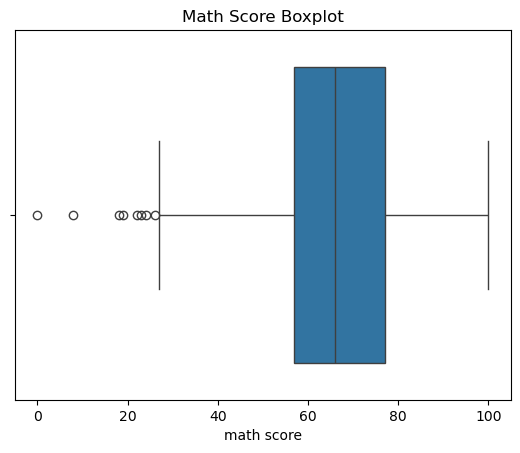

In [15]:
sns.boxplot(x=df['math score'])
plt.title("Math Score Boxplot")
plt.show()


In [17]:
df['zscore'] = (df['math score'] - df['math score'].mean()) / df['math score'].std()
print(df['zscore'])


0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: zscore, Length: 1000, dtype: float64


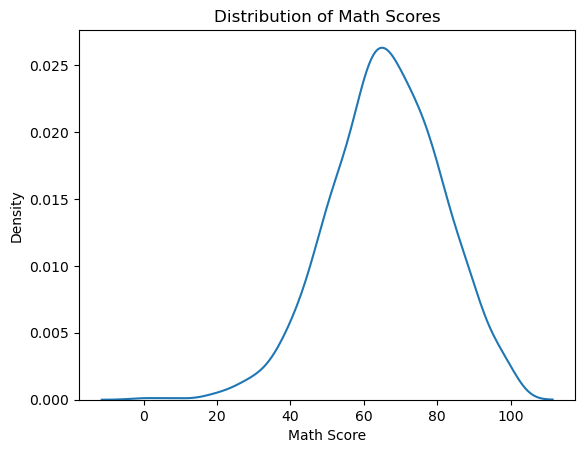

In [19]:
sns.kdeplot(df['math score'])
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Density")
plt.show()
